# Assignment III - 4110/5110/7110

Feb 28, 2025

### Name: Maxim Ciobanu


This assignment is to be done individually. Please do not use AI tools. If you collaborate with someone in the class, mention their name.



In [2]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

## Generate Data

In [3]:
npoints = 50
ncenters = 3

In [4]:
data = [(random(), random()) for i in range(npoints)] + [(0.0+random(), 0.5+random()) for i in range(npoints)]

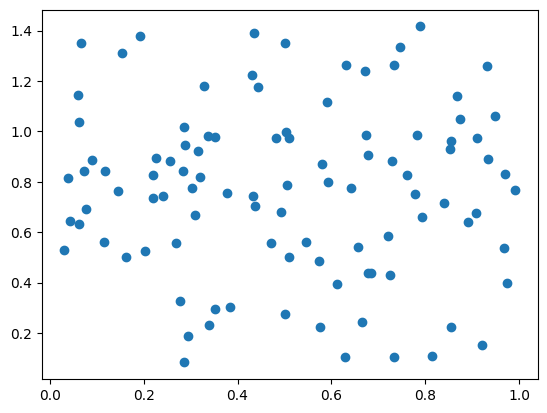

In [5]:
plt.scatter(*zip(*data))

In [6]:
centers = [(random(),  random()) for i in range(ncenters)]

## Define the distance and the k-means function

In [7]:
def distance(point, center) :
    return (center[0] - point[0])**2 + (center[1] - point[1])**2

In [8]:
def kmeans(data, centers):
    clusterid = np.zeros(len(data))
    #print(clusterid.shape)
    prevd = 10000
    d = 0
    td = []
    while (1) :
        j = 0
        d = 0
        for p in data :
            dp = 100
            i = 0
            for c in centers :
                #print(p,c)
                #print("dp", distance(p,c))
                if (distance(p, c) < dp ) :
                    clusterid[j] = i
                    dp = distance(p,c)

                i = i+1
            d = d + dp

            j = j+1
        #print(clusterid)
        # update the cluster centers

        # save the total distance in the current iteration
        td.append(d)
        for idx in range(3) :
            centers[idx] = tuple(sum([np.array(data[i]) for i in range(len(data)) if clusterid[i] == idx]) /
                                 sum([1 for i in range(len(data)) if clusterid[i] == idx]) )
        if (prevd - d > 0.0001) :
            prevd = d
        else:
            break

    return centers, clusterid, td

In [9]:
centers

[(0.3669059859582955, 0.8538732348972293),
 (0.5130370166375008, 0.6980009417198224),
 (0.3055063080588585, 0.37747118483344666)]

## Call the k-means and save and plot the results.

In [10]:
centers, colors, td = kmeans(data, centers)

In [11]:
centers

[(np.float64(0.26028031659053835), np.float64(0.9200814112831074)),
 (np.float64(0.7970143159759242), np.float64(0.9503846111647157)),
 (np.float64(0.5483492651408443), np.float64(0.3601022846610318))]

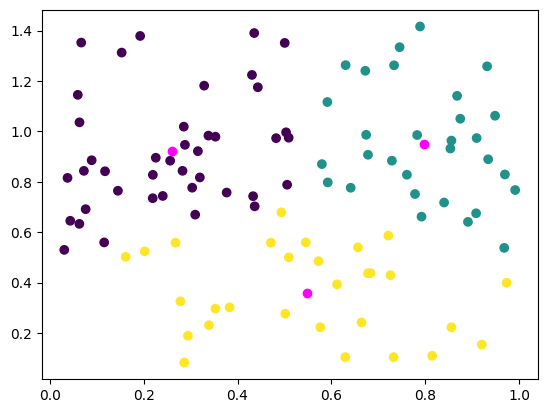

In [17]:
plt.scatter(*zip(*data), c=colors)
plt.scatter(*zip(*centers),color='magenta')

In [18]:
td

[12.255949894350666,
 np.float64(8.521310528172164),
 np.float64(8.068827875879103),
 np.float64(7.583716431514358),
 np.float64(7.261156018113747),
 np.float64(7.174193555567588),
 np.float64(7.174193555567588)]

## Plot the total distance in each iteration as a function of the iteration number

This should be monotonically decreasing.

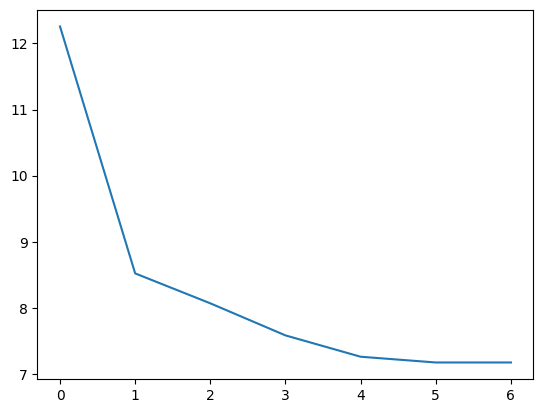

In [19]:
plt.plot(td)

## Assignment

You task is to implement the distance function using the swap-test as discussed in the class. The boiler plate code for qiskit needed to import the libraries and conduct the simulation in not provided here. You can use the code from the previous assignment (or lookup the qiskit documentation).

Following three things are expected as part of your submission.

1. The code for swap-test implementation of the distance function.
2. The clustering obtained using the swap-test, i.e., plot the second figure in the notebook.



3. For each point $p$, define $d_p$ to be the distance to the closest center. The total distance is then
$\sum_p d_p$. Plot the total distance as a function of iteration number (as in the last plot above).

Run  your test on a larger sized - different input - generated randomly.

**Submission**: Please run the notebook and export/save it as PDF. Sometimes chrome works better at exporting the PDF then other browsers. Submit a single PDF file. Do remember to write your name on the submission

# Test